In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 

In [2]:
data= pd.read_csv("/content/crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
data1=data.drop(['Unnamed: 0'],axis=1)
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
# Normalize heterogenous numerical data 
from sklearn.preprocessing import normalize
data2_norm=pd.DataFrame(normalize(data1),columns=data1.columns)
data2_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


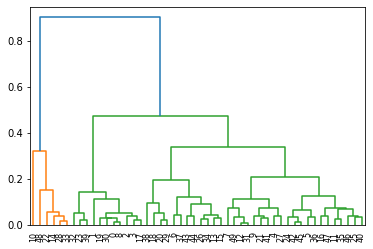

In [6]:
dendrogram = sch.dendrogram(sch.linkage(data2_norm, method='complete'))

In [7]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=3)

In [8]:
# save clusters for chart
y_hc = hc.fit_predict(data2_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2])

In [9]:
y=pd.DataFrame(hc.fit_predict(data2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    24
2    20
1     6
Name: clustersid, dtype: int64

In [10]:
data1['clustersid']=hc.labels_
data1

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,2


In [11]:
data1.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.770833,129.083333,65.958333,18.575000
1,1,2.616667,54.833333,62.000000,12.333333
2,2,11.760000,255.550000,66.100000,27.090000


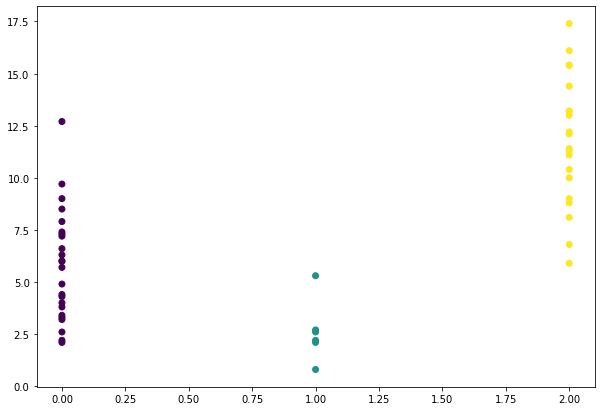

In [14]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data1['clustersid'],data1['Murder'], c=hc.labels_) 

**K means clustering ***

In [15]:
# k means clustering 
from sklearn.cluster import KMeans

In [17]:
data= pd.read_csv("/content/crime_data.csv")

In [18]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,1:])

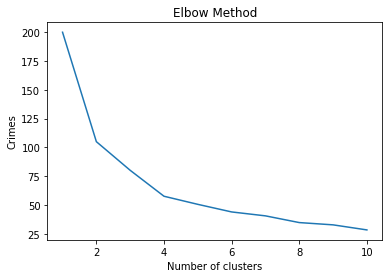

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Crimes')
plt.show()

In [21]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=45)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=45)

In [22]:
clusters_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [23]:
#Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_

In [25]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


In [26]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


**DBSCAN***

In [27]:
# Dbscan 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
data =pd.read_csv("/content/crime_data.csv")
data

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [31]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [32]:
array=data.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [33]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [34]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [35]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0])

In [36]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [37]:
pd.concat([data,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
